In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#Create the path
path = r'C:\Users\dmlos\Instacart Basket Analysis'

In [5]:
#Import the pickle file with the combined customer and spending data
df_ords_prods_merged_customer_frequency_spending_2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_merged_customer_frequency_spending_2.pkl'))

In [43]:
#View the data types for each column within the combined pickle file.
df_ords_prods_merged_customer_frequency_spending_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 32 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   product_id                        int32  
 1   product_name                      object 
 2   aisle_id                          int64  
 3   department_id                     int64  
 4   prices                            float64
 5   order_id                          int32  
 6   user_id                           int64  
 7   order_number                      int64  
 8   orders_day_of_week                int64  
 9   order_hour_of_day                 int64  
 10  days_since_prior_order            float64
 11  add_to_cart_order                 int32  
 12  reordered                         int8   
 13  busiest_day                       object 
 14  busiest_days                      object 
 15  busiest_hours                     object 
 16  busiest_periods                   

# 3.) Create a Histogram for Order_Hour_Of_Day

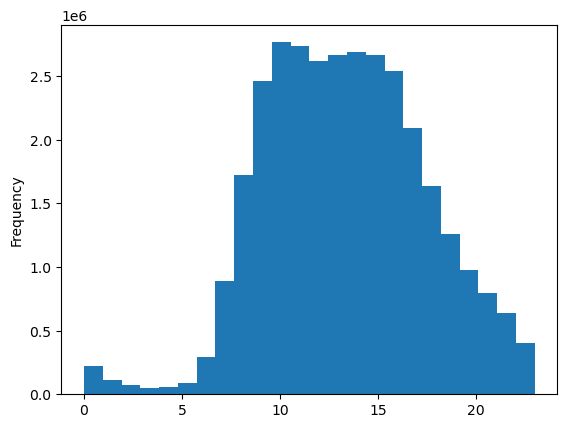

In [73]:
#Create a histogram for order based on the order_hour_of_day column
df_hist_order_hour_of_day = df_ords_prods_merged_customer_frequency_spending_2['order_hour_of_day'].plot.hist(bins=24)

The above histogram shows the typical number of orders in a given hour per day.

# 4.) Create a Bar Chart for "Loyalty"

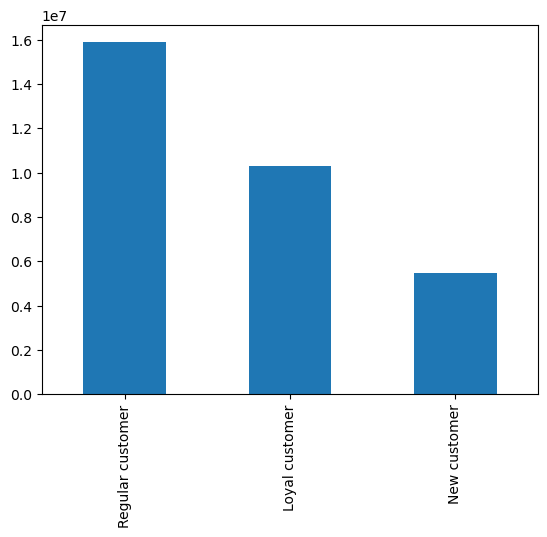

In [14]:
#Create a bar chart for the dataset based on the loyalty_flag column
bar_loyalty_flag = df_ords_prods_merged_customer_frequency_spending_2['loyalty_flag'].value_counts().plot.bar()

# 5.) Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [28]:
#Need to create a sample seed to begin creating the chart.
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merged_customer_frequency_spending_2)) <= 0.7

In [29]:
#Create the boolean
dev

array([False,  True, False, ..., False,  True,  True])

In [30]:
#Check the new, randomly-assigned numbers
np.random.rand(10)

array([0.16891835, 0.04368635, 0.41602642, 0.88973306, 0.66299301,
       0.78345326, 0.02169353, 0.79078115, 0.45980038, 0.17173956])

In [31]:
#We have to create an 70/30 sample in order to produce the requested linechart
small = df_ords_prods_merged_customer_frequency_spending_2[~dev]

In [36]:
df_small = small[['order_hour_of_day', 'prices']]

In [38]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9729729 entries, 0 to 32434209
Data columns (total 2 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_hour_of_day  int64  
 1   prices             float64
dtypes: float64(1), int64(1)
memory usage: 222.7 MB


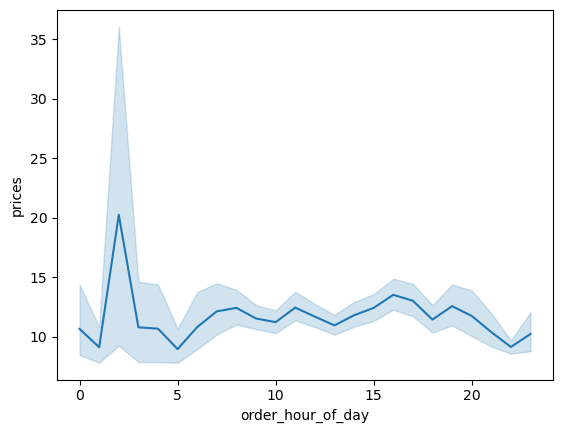

In [39]:
#Create the actual linechart
line_chart_prices_order_hour_of_day = sns.lineplot(data=df_small, x = 'order_hour_of_day', y = 'prices')

# 6.) Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:In a markdown cell beneath your line chart, describe what the line chart shows.

In [52]:
#Create a subset for the linechart of age and number of dependents.
df_age_dependants = small[['Age', 'Number_Dependants']]

In [55]:
#Look at the new subset
df_age_dependants.head()

,Age,Number_Dependants
0,81,1
2,81,1
3,81,1
6,81,1
10,81,1


In [56]:
df_age_dependants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9729729 entries, 0 to 32434209
Data columns (total 2 columns):
 #   Column             Dtype
---  ------             -----
 0   Age                int64
 1   Number_Dependants  int64
dtypes: int64(2)
memory usage: 480.7 MB


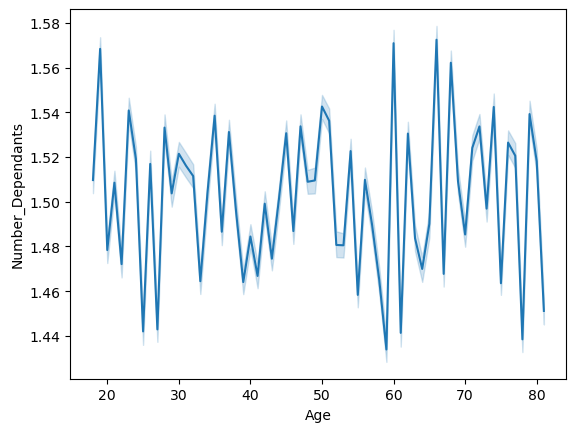

In [57]:
#Create the actual linechart
line_chart_age_family_status = sns.lineplot(data=df_age_dependants, x = 'Age', y = 'Number_Dependants')

This chart demonstrates the relationship between number of dependants in relation to a customer and the age of the customer.

# 7.) You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [60]:
#Create a subset for the linechart of age and spending.
df_age_income = small[['Age', 'Income']]

In [62]:
#look at the new subset
df_age_income.head()

,Age,Income
0,81,49620
2,81,49620
3,81,49620
6,81,49620
10,81,49620


In [61]:
#Look at the new subset
df_age_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9729729 entries, 0 to 32434209
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   Age     int64
 1   Income  int64
dtypes: int64(2)
memory usage: 480.7 MB


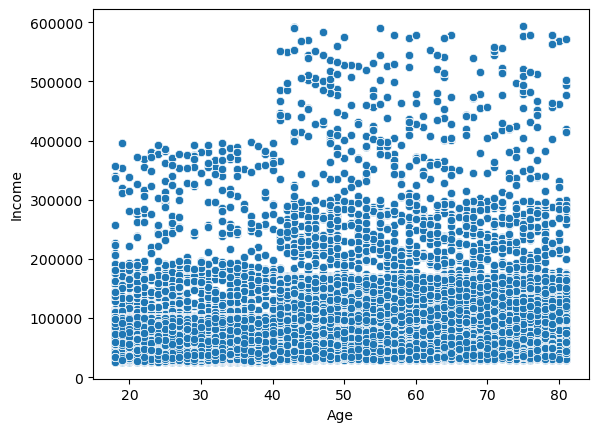

In [63]:
#Create the scatterplot
scatterplot_df_age_income = sns.scatterplot(data=df_age_income, x='Age', y='Income')

The above scatterplot shows each purchase entry by customers' income and age. This chart demonstrates the relationship between income and age. As you go above the age of 40, there is a higher concentration of customers with incomes over 200,000 and 400,000. You can clearly see the demarcations at 100,000, under 200,000, 300,000, and 400,000.

# 8.) Export your visualizations as “.png” files in your relevant project folder.

In [67]:
line_chart_prices_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_chart_prices_order_hour_of_day.png'))

In [68]:
scatterplot_df_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_df_age_income.png'))

In [69]:
line_chart_age_family_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_chart_age_family_status.png'))

In [70]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [74]:
df_hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_hist_order_hour_of_day.png'))